## **Song Popularity Prediction of Indian Songs using Spotify API:**



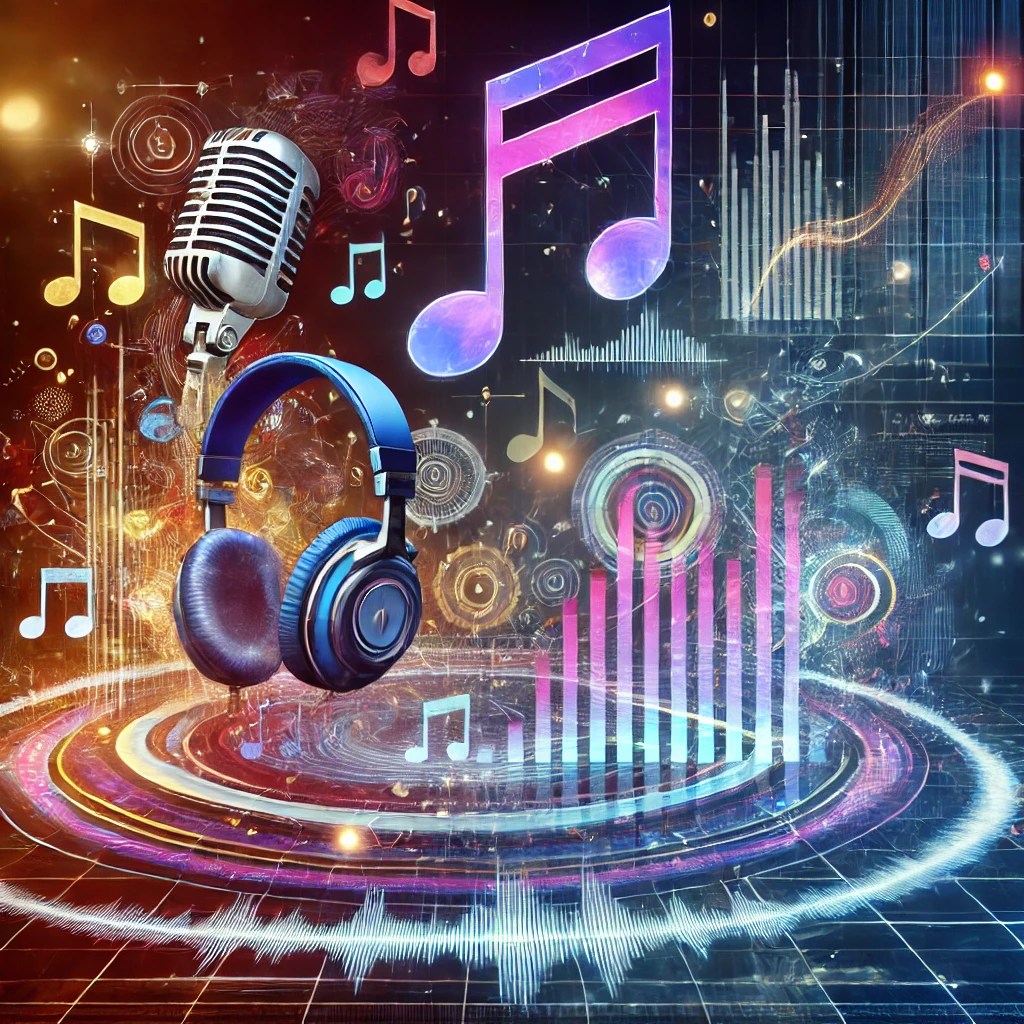

#### **Overview**
This project uses audio characteristics and metadata obtained from the Spotify API to forecast the popularity of Indian music. Key elements influencing song popularity are identified by the analysis of data from different genres and release years (2023 and 2024).

#### **Data Collection** - **API Usage**: Track data and audio characteristics such as danceability, energy, loudness, and tempo were retrieved using the `search` and `audio_features` endpoints of the Spotify API.
More than 30 Indian music styles, such as rap, carnatic, and bhangra, were featured.
- **Procedure**: Up to 1000 tracks per genre and year were gathered, with 50 tracks per genre being collected in groups.
Compiling and saving a dataset of more than 60,000 tracks as `indian_tracks_2023_2024_with_features.csv` was the output.

#### **Business Scenario** Knowing the popularity of songs is helpful:
- **Artists/Labels**: Work on compositions and plan marketing campaigns.
- **Streaming Platforms**: Create playlists and customize suggestions.
- **Event Planners**: Choose music for advertisements and events.

Popularity is rated from 0 to 100, and listener choices are greatly influenced by audio characteristics like danceability and tempo. For those involved in the music industry, this project makes data-driven decisions possible.


# **Exploratory Data Analysis**

In [25]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = 'content/indian_tracks_2023_2024_with_features (2).csv'  # Replace with your dataset path
dataset = pd.read_csv(file_path)

# General Information
print("Dataset Shape:", dataset.shape)
print("Missing Values:\n", dataset.isnull().sum())
print("\nDataset Info:")
print(dataset.info())


Dataset Shape: (50441, 20)
Missing Values:
 track_name          0
artist              0
album               1
release_date        0
popularity          0
track_id            0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50441 entries, 0 to 50440
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        50441 non-null  object 
 1   artist            50441 non-null  object 
 2   album             50440 non-null  object 
 3   release_date      50441 non-null  object 
 4   popularity        50441 non-null  int64  
 5   track_id          50441 non-null  object 
 6 

The dataset contains 50,441 records and 20 columns, capturing Indian songs' metadata and audio features. Only one missing value exists in the album column, with all other data complete.

Metadata columns include track_name, artist, album, release_date, year, genre, and popularity (the target variable, ranging from 0 to 100). Audio features like danceability, energy, loudness, tempo, speechiness, and acousticness provide insights into each track's composition.

The dataset comprises nine numerical columns, five integer columns, and six categorical columns, using 7.7 MB of memory. It is clean and ready for preprocessing and predictive modeling.

In [26]:
# View the first few rows
print("\nFirst 5 Rows:")
print(dataset.head())



First 5 Rows:
                                          track_name                 artist  \
0     Shri Ram Jai Ram Jai Jai Ram (Gondavale chant)   Ramana Balachandhran   
1                               Ramachandraya Janaka         Sooryagayathri   
2                                        Ramashtakam    Uthara Unnikrishnan   
3                                    Sri ram jayaram  Gayathri Girish, Team   
4  Pet Lovers Anthem (Paal Mazhayin Thooralil) (F...        Rajhesh Vaidhya   

                                               album release_date  popularity  \
0     Shri Ram Jai Ram Jai Jai Ram (Gondavale chant)    3/12/2023          28   
1                               Ramachandraya Janaka   11/30/2023          26   
2                                        Ramashtakam    3/16/2023          27   
3  Yogi Ramsuratkumar Ashram Padalgal Volume 1 Ga...     5/9/2023          23   
4  Pet Lovers Anthem (Paal Mazhayin Thooralil) (F...     8/9/2023          20   

                 track_

The above data is the first 5 records that are available in our dataset

In [27]:

# Statistical Summary
print("\nSummary Statistics:")
print(dataset.describe())




Summary Statistics:
         popularity          year  danceability        energy           key  \
count  50441.000000  50441.000000  50441.000000  50441.000000  50441.000000   
mean      17.442715   2023.479194      0.582485      0.601653      5.258718   
std       20.727506      0.499572      0.148752      0.203510      3.492543   
min        0.000000   2023.000000      0.064000      0.003520      0.000000   
25%        0.000000   2023.000000      0.477000      0.459000      2.000000   
50%        7.000000   2023.000000      0.590000      0.610000      5.000000   
75%       31.000000   2024.000000      0.692000      0.759000      8.000000   
max      100.000000   2024.000000      0.971000      0.998000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  50441.000000  50441.000000  50441.000000  50441.000000   
mean      -8.042237      0.585139      0.091166      0.502781   
std        3.708538      0.492703      0.095352      0.305922   
min    

### **Summary Statistics:**

- **Popularity**: Ranges from 0 to 100, with an average of 17.44. Most tracks are less popular.
- **Year**: Tracks are from 2023 and 2024.
- **Danceability**: Average is 0.58, indicating moderate suitability for dancing.
- **Energy**: Mean is 0.60, reflecting moderately energetic tracks.
- **Loudness**: Averages -8.04 dB, with most tracks being relatively quiet.
- **Mode**: Majority of tracks are in major mode (mean 0.58).
- **Speechiness**: Mean is 0.091, showing most tracks are musical.
- **Acousticness**: Balanced between acoustic and electronic (mean 0.50).
- **Tempo**: Average tempo is 117.88 BPM, indicating moderate speed.
- **Duration**: Tracks average ~5.3 minutes, ranging from ~15 seconds to ~96 minutes.

In [28]:
# Convert milliseconds to seconds
dataset['duration_sec'] = dataset['duration_ms'] / 1000
print("New column 'duration_sec' added successfully.")

New column 'duration_sec' added successfully.


A new column called 'duration_sec' is added to the dataset. This column represents the duration of tracks in seconds, making it more interpretable for analysis.

In [29]:
dataset.columns

Index(['track_name', 'artist', 'album', 'release_date', 'popularity',
       'track_id', 'year', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'duration_sec'],
      dtype='object')

In [30]:
dataset.drop('duration_ms', axis=1, inplace=True)

Dropping the column 'duration_ms' as we are using the column 'duration_sec' for prediction.

In [31]:
# Unique values in each column
print("\nUnique Values in Categorical Columns:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataset[col].nunique()} unique values")



Unique Values in Categorical Columns:
track_name: 30343 unique values
artist: 12985 unique values
album: 20029 unique values
release_date: 674 unique values
track_id: 36541 unique values
genre: 30 unique values


### **Unique Values in Categorical Columns**

The dataset contains the following unique values for its categorical columns:

- **`track_name`**: 30,343 unique song titles.
- **`artist`**: 12,985 unique artists.
- **`album`**: 20,029 unique albums.
- **`release_date`**: 674 unique release dates.
- **`track_id`**: 36,541 unique track identifiers (Spotify-provided unique IDs).
- **`genre`**: 30 unique music genres.

### **Observations**
- The large number of unique values in `track_name`, `artist`, `album`, and `track_id` reflects the dataset's diversity.
- The relatively small number of unique values in `genre` (30) indicates a focused set of Indian music genres. This can be a useful categorical variable for analysis and modeling.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


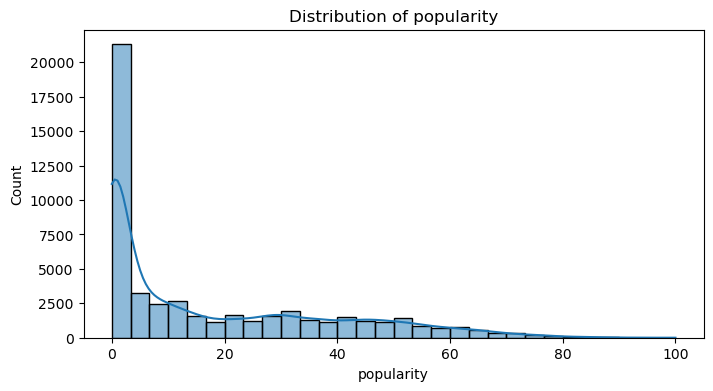

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


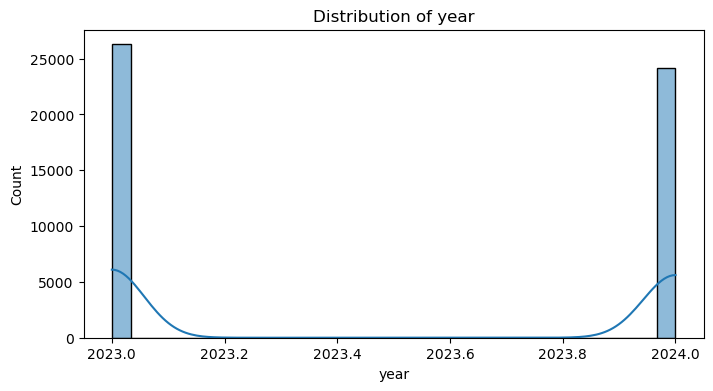

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


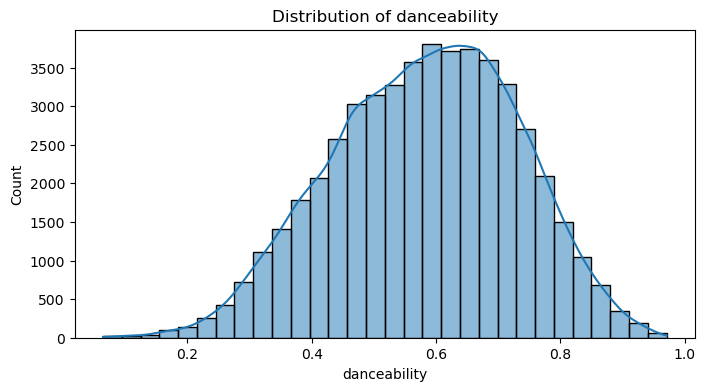

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


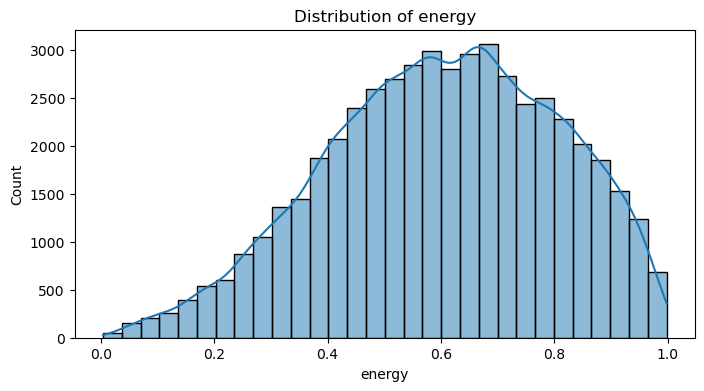

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


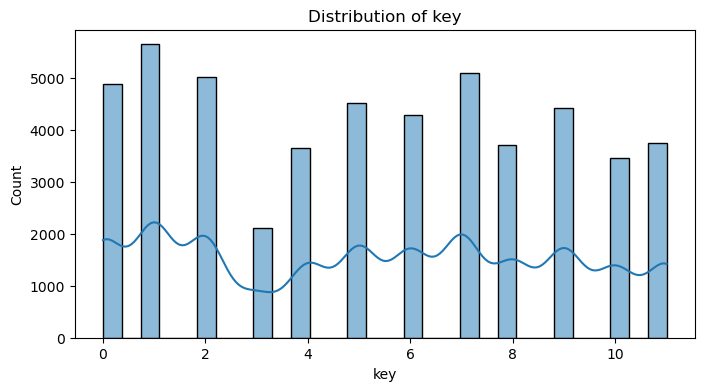

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


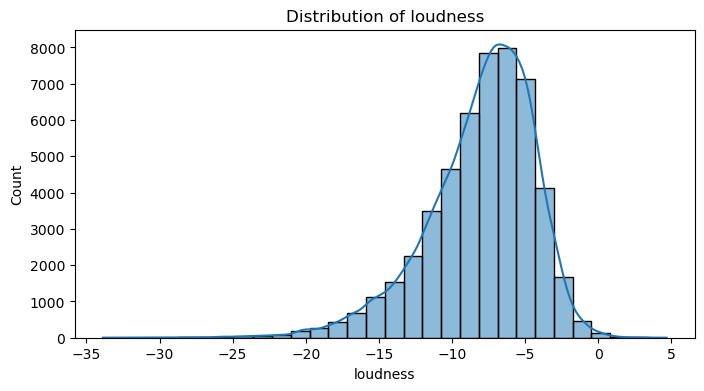

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


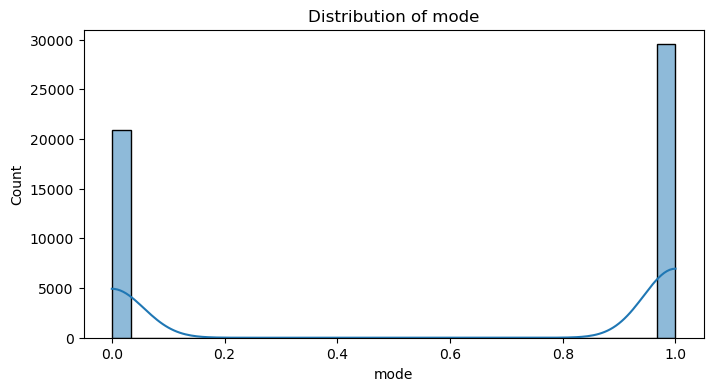

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


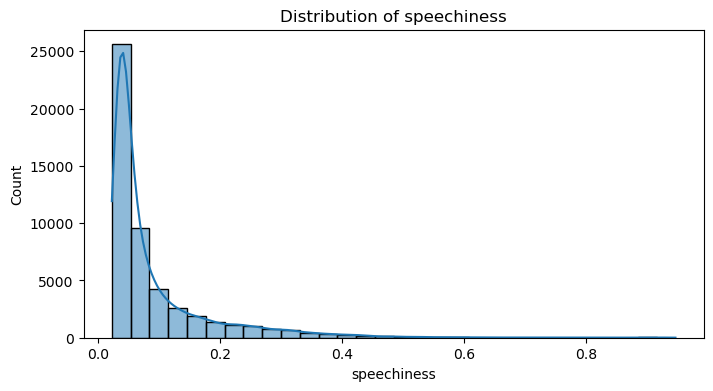

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


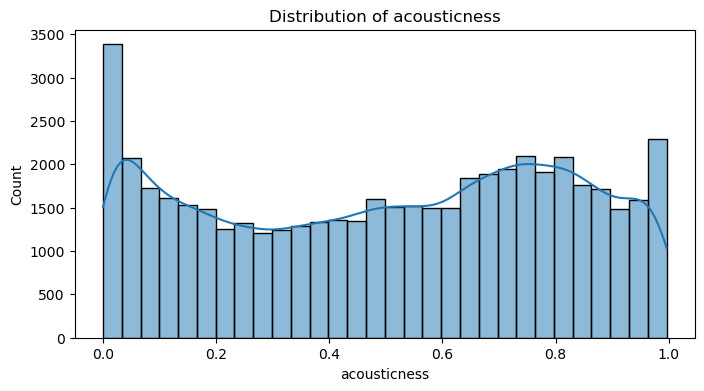

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


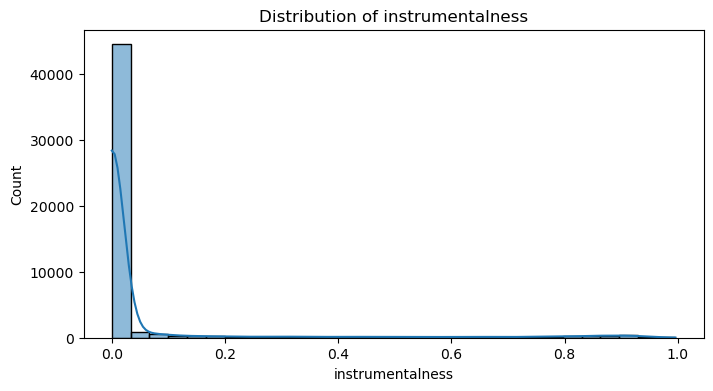

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


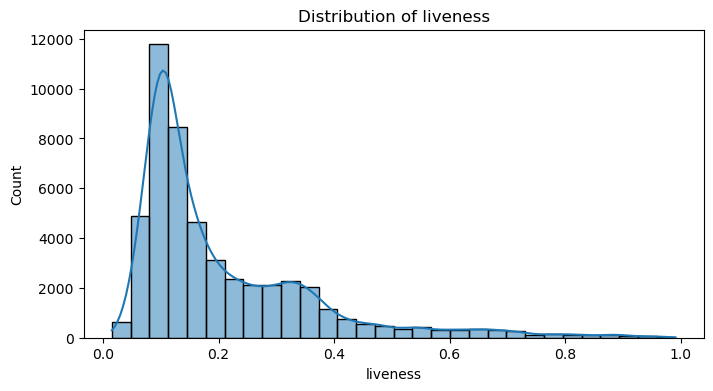

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


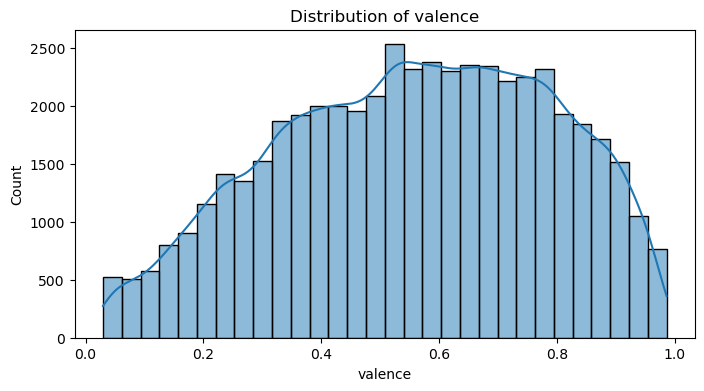

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


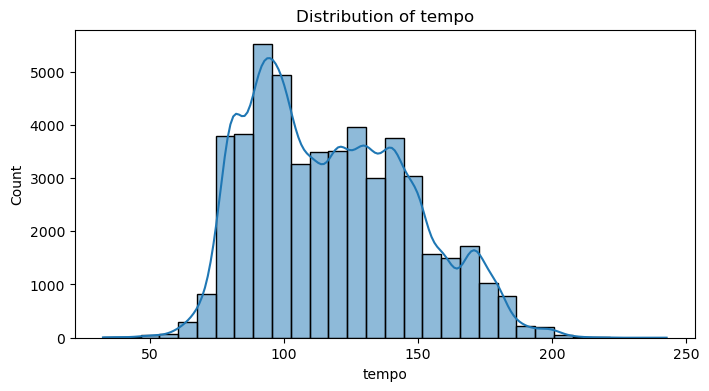

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


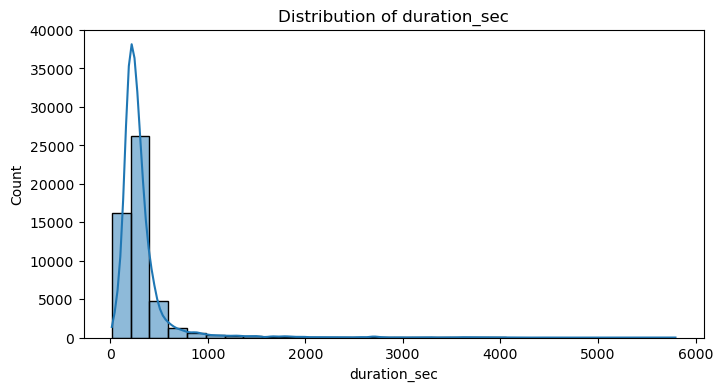

In [32]:
# Distribution plots for numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


### **Plot Insights**

1. **Popularity Distribution**: A small number of songs have popularity scores near 100, while the majority have low scores.

2. **Year Distribution**: Songs are distributed equally between 2023 and 2024.

3. **Danceability Distribution**: Moderate appropriateness for dancing is indicated by danceability scores between 0.4 and 0.8.

4. **Energy Distribution**: The majority of songs exhibit moderate energy levels, with energy scores ranging from 0.4 to 0.8.

5. **Key Distribution**: There is no dominant key; musical keys are uniformly distributed over values 0–11.

6. **Loudness Distribution**: Most songs cluster around -10 dB, with a range of -35 dB to +5 dB.

7. **Mode Distribution**: Major mode (value 1) is used for most tracks.

8. **Speechiness Distribution**: The majority of tracks have low speechiness (below 0.2), suggesting that they are predominantly musical.

9. **Acousticness Distribution**: The acoustic and electronic elements of the tracks are well-balanced.

10. **Instrumentalness Distribution**: The majority of the tunes feature voices, as seen by the low instrumentality.

11. **Liveness Distribution**: Studio recordings predominate, with scores typically falling below 0.3.

12. **Valence Distribution**: Balanced emotional tones are indicated by valence ratings that hover around 0.5.

13. **Tempo Distribution**: The majority of songs exhibit moderate pace, with tempos ranging from 100 to 140 BPM.

14. **Duration Distribution**: Most songs are 3–5 minutes long (180–300 seconds), with a small number exceeding 1000 seconds, likely representing extended tracks.


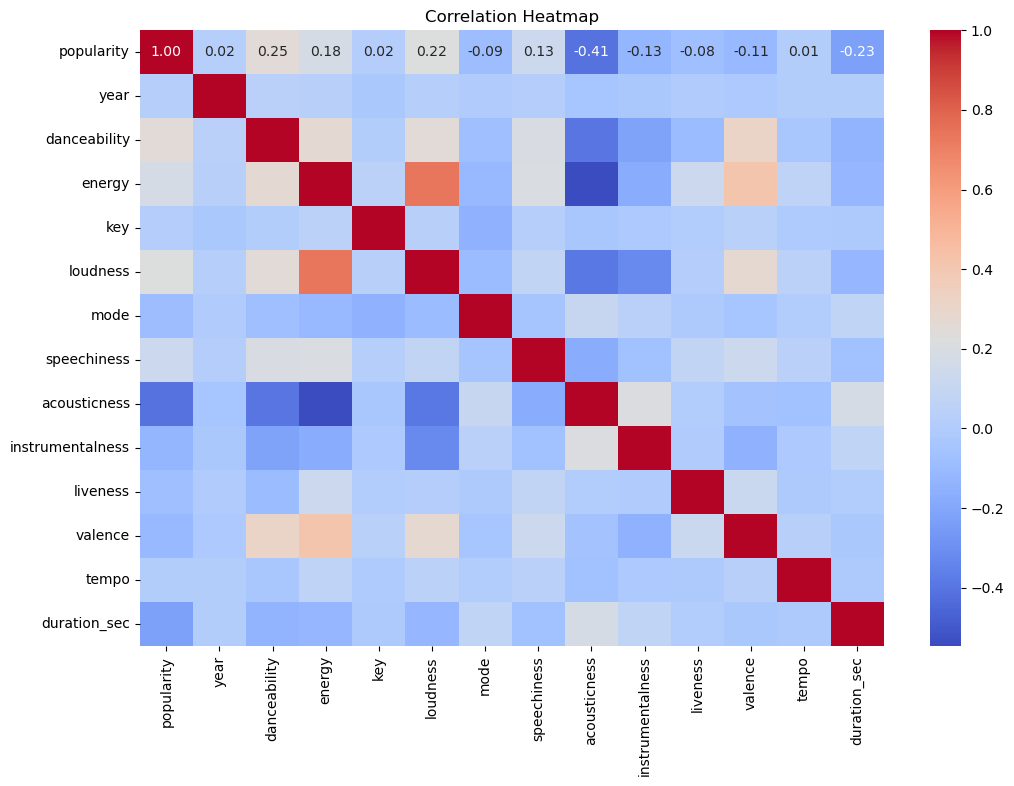

In [33]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### **Insights from Correlation Heatmap**

1. **Popularity**: Higher for tracks with more `danceability`, `energy`, and `loudness`, but lower for tracks with high `acousticness` and longer `duration_sec`.
2. **Danceability**: Positively linked to `energy` and `loudness`, negatively related to `acousticness`.
3. **Energy**: Strongly correlated with `loudness` and negatively with `acousticness`.
4. **Acousticness**: Higher in less energetic, quieter, and instrumental tracks.
5. **Valence**: Higher for tracks that are more danceable and energetic.

Popular tracks are upbeat, loud, and less acoustic, while acoustic and instrumental tracks are less popular.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` becaus

Text(0.5, 1.02, 'Enhanced Pair Plot of Selected Features')

<Figure size 1200x1200 with 0 Axes>

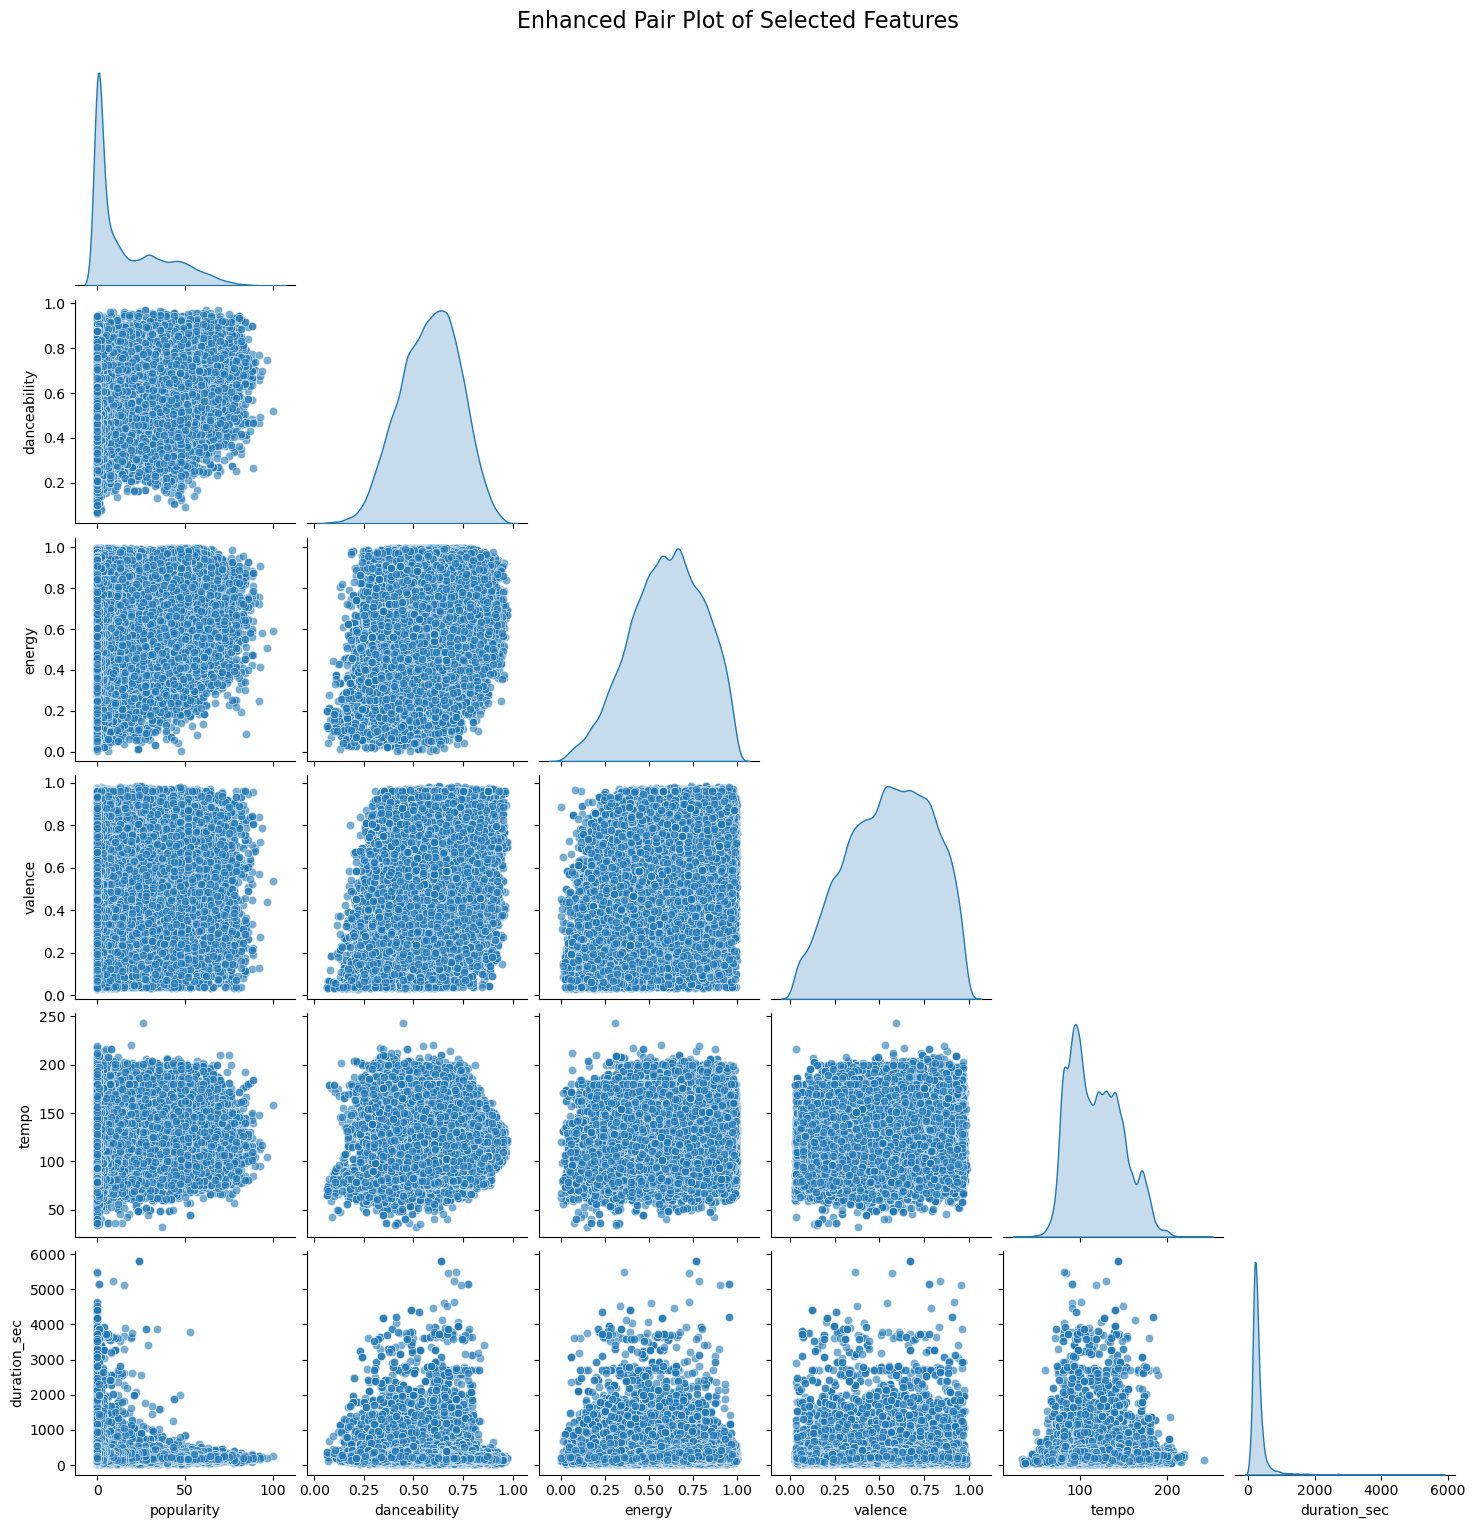

In [34]:
# Select a subset of features for better visualization
selected_features = ['popularity', 'danceability', 'energy', 'valence', 'tempo', 'duration_sec']

# Create a pair plot with enhanced visualization
plt.figure(figsize=(12, 12))
pairplot = sns.pairplot(
    dataset[selected_features],
    diag_kind="kde",  # Kernel density estimation for diagonal plots
    corner=True,      # Show only lower triangle of plots to avoid redundancy
    plot_kws={'alpha': 0.6},  # Adjust transparency for scatter plots
    height=2.5,       # Adjust the height of each subplot
    palette='viridis'
)

# Add a title to the entire pair plot
pairplot.fig.suptitle("Enhanced Pair Plot of Selected Features", y=1.02, fontsize=16)

### **Insights from Pair Plot**

1. **Popularity**: Higher for tracks with more danceability, energy, and valence, but lower for longer durations.
2. **Feature Relationships**:
   - Danceability and energy are positively correlated with valence (happier tracks are more energetic and danceable).
   - No clear link between tempo and other features.
3. **Distributions**:
   - Most tracks have moderate danceability (0.5–0.7), energy, and valence.
   - Popularity is skewed low, and most tracks are under 10 minutes.

Upbeat, happy, and shorter tracks are generally more popular.

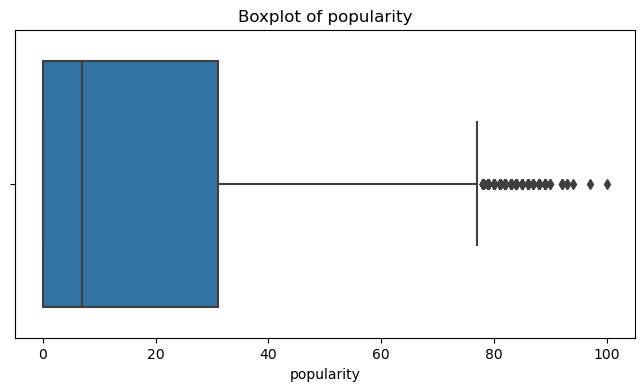

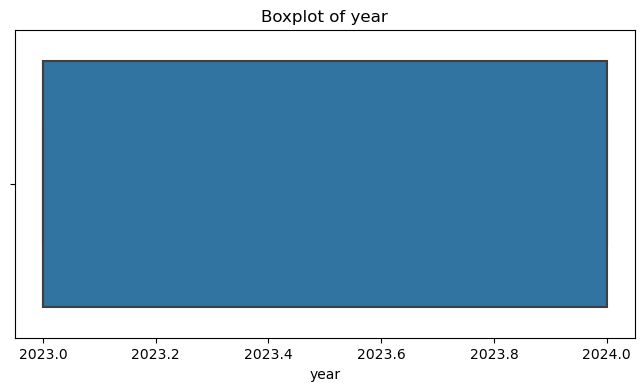

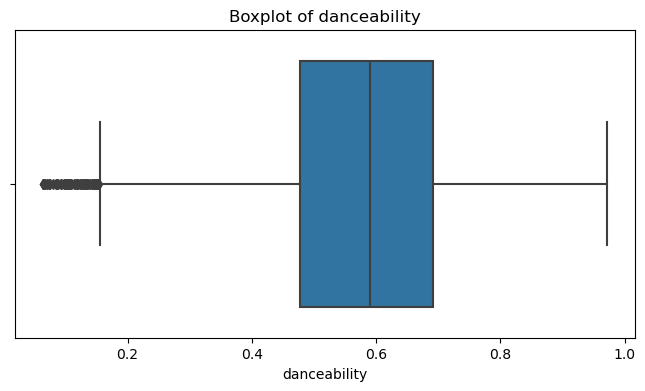

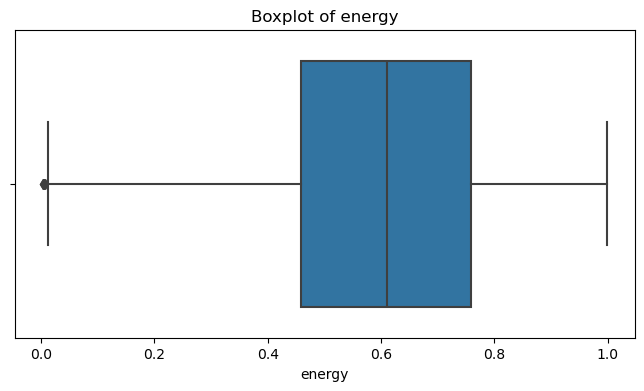

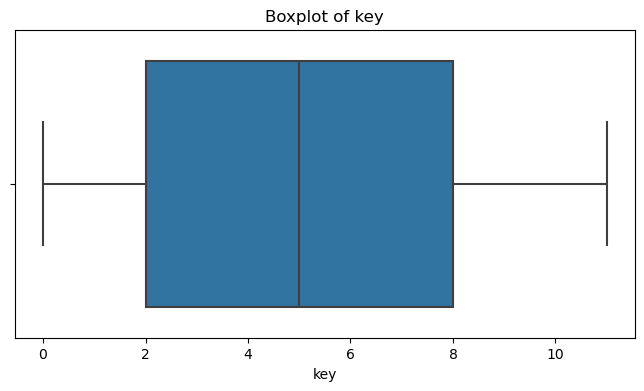

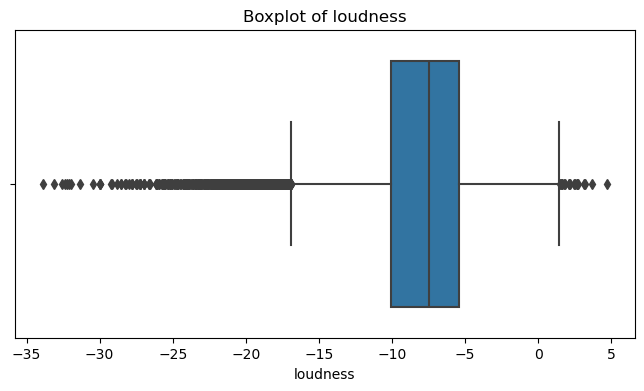

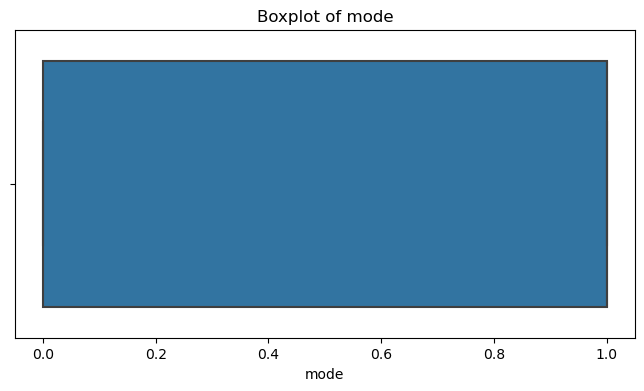

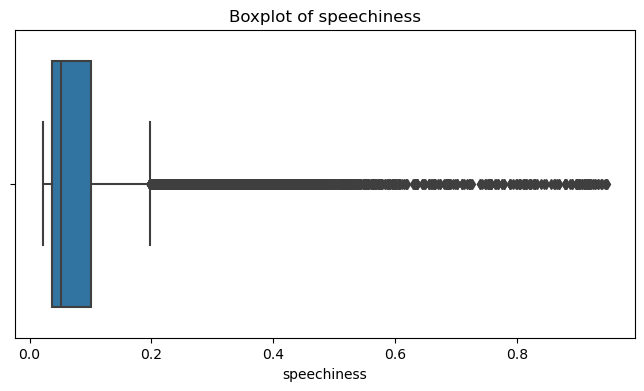

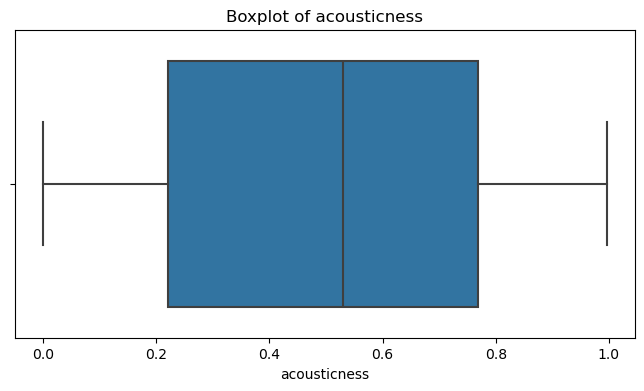

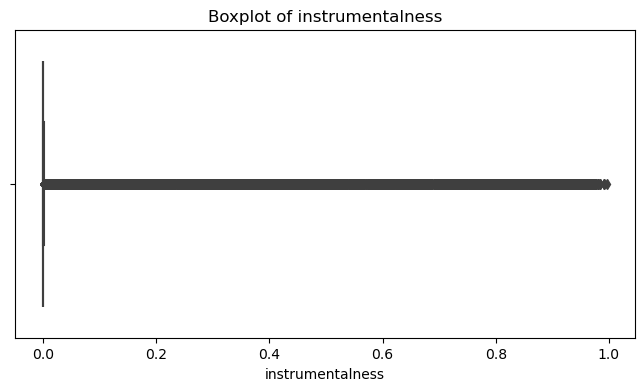

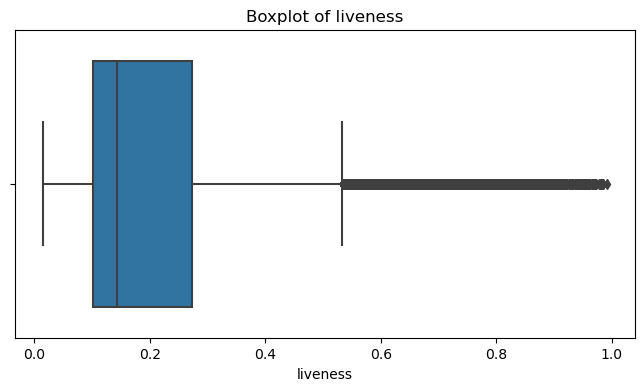

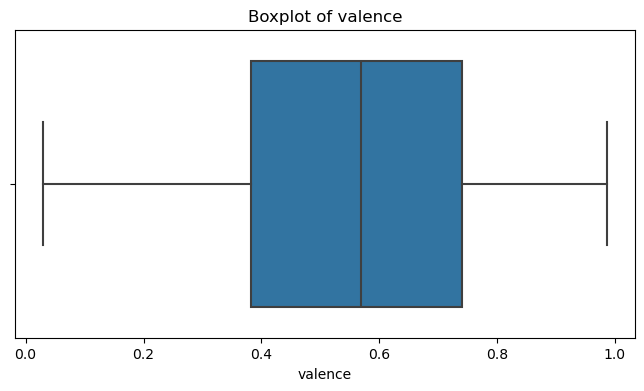

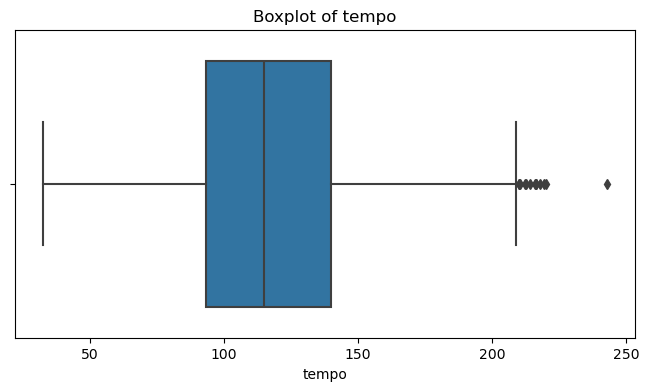

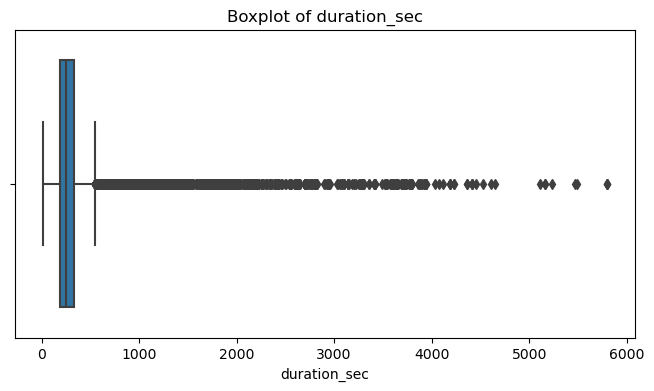

In [35]:
# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dataset, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


Insights from the Boxplots
1. Popularity:
Most songs have low popularity, with many outliers indicating a small number of highly popular tracks.
The interquartile range (IQR) is concentrated between 0 and 30.
2. Year:
All songs are evenly distributed across 2023 and 2024, showing no variability in this field.
3. Danceability:
Scores are centered around 0.6, with very few low outliers (below 0.2).
Most tracks have moderate danceability.
4. Energy:
The median energy score is ~0.6, with a balanced distribution and few low outliers near 0.
5. Key:
Musical keys are evenly spread across all values (0–11), with no significant skew.
6. Loudness:
Most tracks fall between -15 dB and -5 dB, with a few outliers both in extremely quiet and loud ranges.
7. Mode:
Tracks are evenly divided between major (1) and minor (0) modes.
8. Speechiness:
Most tracks have low speechiness (below 0.2), with a few outliers up to 0.8, indicating primarily musical content.
9. Acousticness:
Tracks show a wide range of acousticness, with the median around 0.5, reflecting a mix of acoustic and electronic elements.
10. Instrumentalness:
Majority of tracks have very low instrumentalness, suggesting the prevalence of vocals.
11. Liveness:
Liveness scores are generally low, with a few outliers above 0.6, indicating most tracks are studio recordings.
12. Valence:
Tracks are evenly distributed across valence (positivity), with a median around 0.5.
13. Tempo:
With some outliers reaching 200 BPM, most tunes have tempos between 100 and 140 BPM.
14. Duration (sec):
Most songs are under 600 seconds (10 minutes), with a long tail of outliers extending beyond 3000 seconds.

In [36]:
# Identify duplicate rows
duplicate_rows = dataset[dataset.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Count of duplicate rows
print(f"\nNumber of Duplicate Rows: {duplicate_rows.shape[0]}")


Duplicate Rows:
                                              track_name  \
100                                  Piecing It Together   
201                        Parandhamavati Jayati (Veena)   
203                                        Oruruvaayinai   
212                                 Giriraja Suta Tanaya   
222                              Idenna Adisayam (Veena)   
...                                                  ...   
50088                                      ANTHEM PART 3   
50277                   Mere Naseeb Mein - From "Naseeb"   
50377                                    Thukra Ke Mujhe   
50378  Paas Rehta Hai - From "Ameer Aadmi Ghareeb Aadmi"   
50382                              Kabhi Khamosh Ho Jana   

                                                  artist  \
100             Karthick Iyer, Indosoul by Karthick Iyer   
201                                 Ramana Balachandhran   
203    Sound Creed, Vittal Rangan, Sumesh Narayanan, ...   
212                    

There are total **3253** duplicate records are present in the dataset.

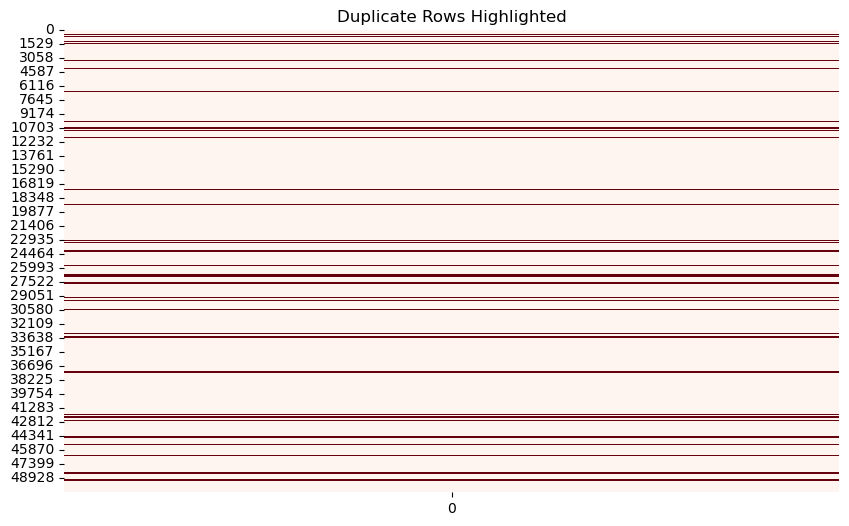

In [37]:
# Highlight duplicate rows in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.duplicated(keep=False).values.reshape(-1, 1), cbar=False, cmap='Reds')
plt.title('Duplicate Rows Highlighted')
plt.show()


The above plot is the graphical representation of duplicate rows that are present in the dataset.

In [38]:
# Keep only the first occurrence of duplicates
dataset = dataset.drop_duplicates(keep='first')
# Check the new shape of the dataset
print(f"\nDataset Shape After Dropping Duplicates: {dataset.shape}")


Dataset Shape After Dropping Duplicates: (47188, 20)


After dropping the duplicate records the dataset now contains **47188** records.

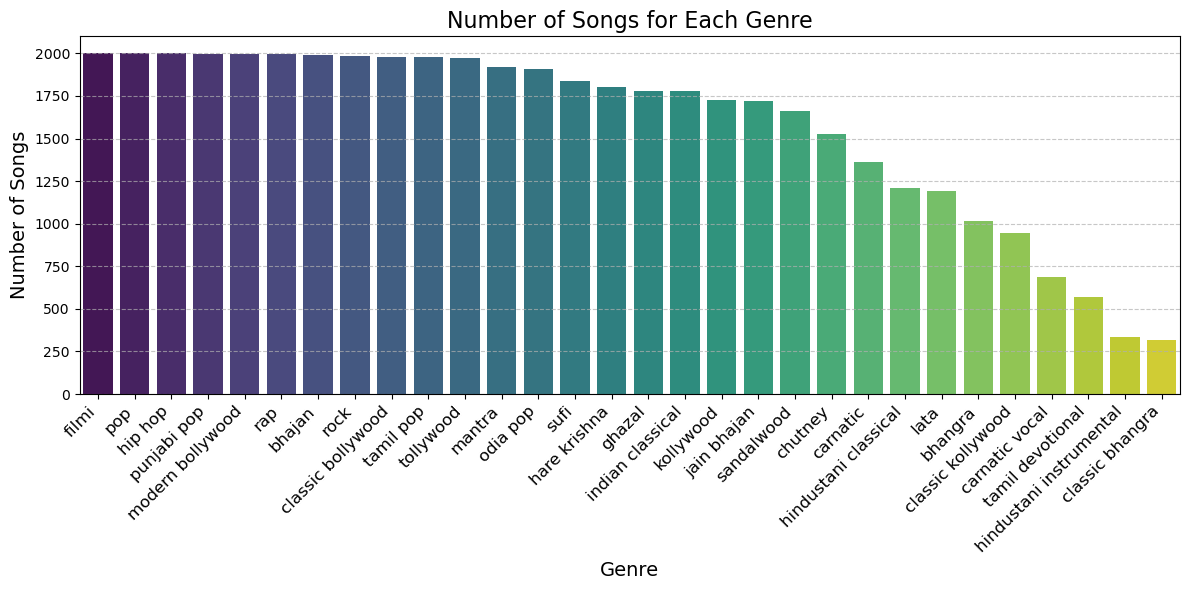

In [39]:
genre_counts = dataset['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Number_of_Songs']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Genre', y='Number_of_Songs', palette='viridis')

# Customize the plot
plt.title('Number of Songs for Each Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**Insights from Genre Distribution**<br>
* Top Genres: Filmi, Pop, Hip Hop, and Punjabi Pop have the most songs, each exceeding 1800 tracks.
* Moderate Representation: Rock, Rap, Tamil Pop, and Tollywood have 1000–1500 songs.
* Least Represented: Classical and niche genres like Carnatic, Hindustani Classical, and Classic Bhangra have fewer than 500 songs.


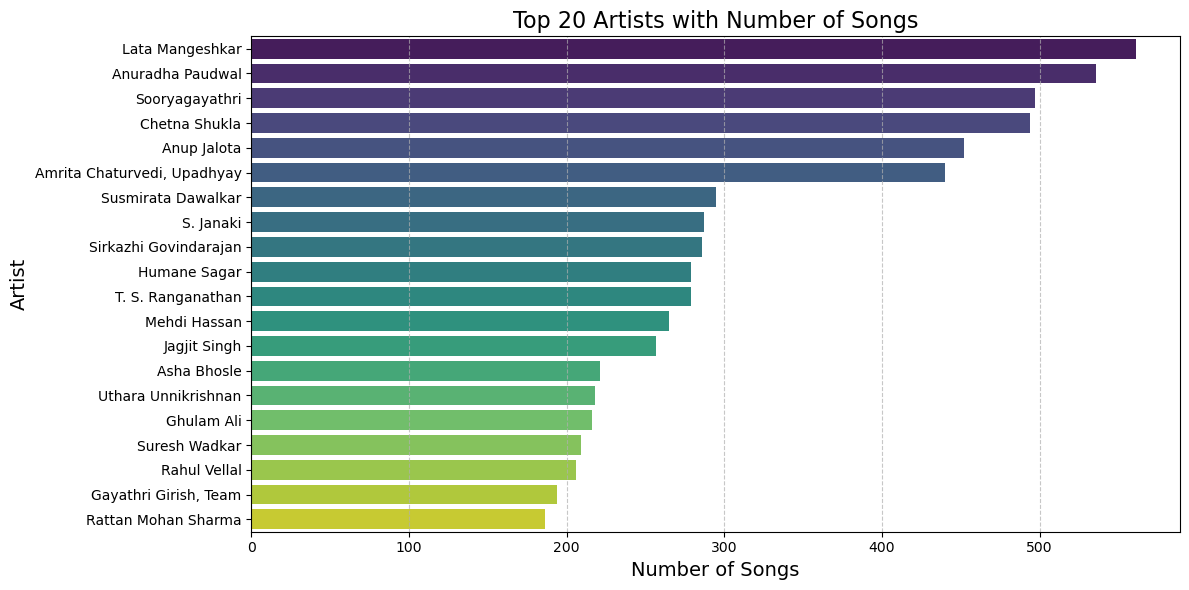

In [40]:
# Count the number of songs for each artist
artist_counts = dataset['artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Number_of_Songs']

# Get the top 20 artists
top_20_artists = artist_counts.head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_artists, x='Number_of_Songs', y='Artist', palette='viridis')

# Customize the plot
plt.title('Top 20 Artists with Number of Songs', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**Insights from Top 20 Artists**
* Top Artists: Lata Mangeshkar and Anuradha Paudwal lead with over 500 songs each.
* Notable Names: Artists like Sooryagayathri, Chetna Shukla, and Anup Jalota also have significant contributions (400+ songs).
* Diversity: The list includes playback singers, classical, and devotional artists, showcasing varied music styles.

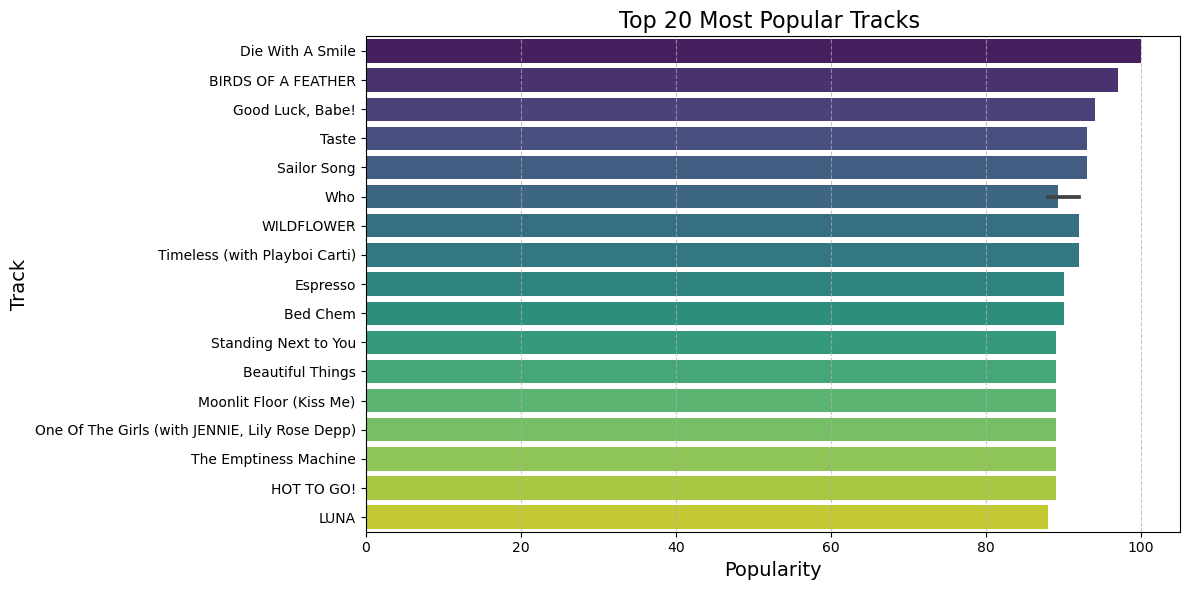

In [41]:
# Top 20 most popular tracks
top_tracks = dataset[['track_name', 'popularity']].sort_values(by='popularity', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_tracks, x='popularity', y='track_name', palette='viridis')
# Customize the plot
plt.title('Top 20 Most Popular Tracks ', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Track', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**Insights from Top 20 Most Popular Tracks**
* Top Tracks: "Die With A Smile" and "BIRDS OF A FEATHER" lead with popularity scores near 100.
* Popularity Range: Most tracks score between 60 and 100.
* Notable Songs: Tracks like "Wildflower," "Timeless," and "LUNA" reflect diverse styles and high audience appeal.

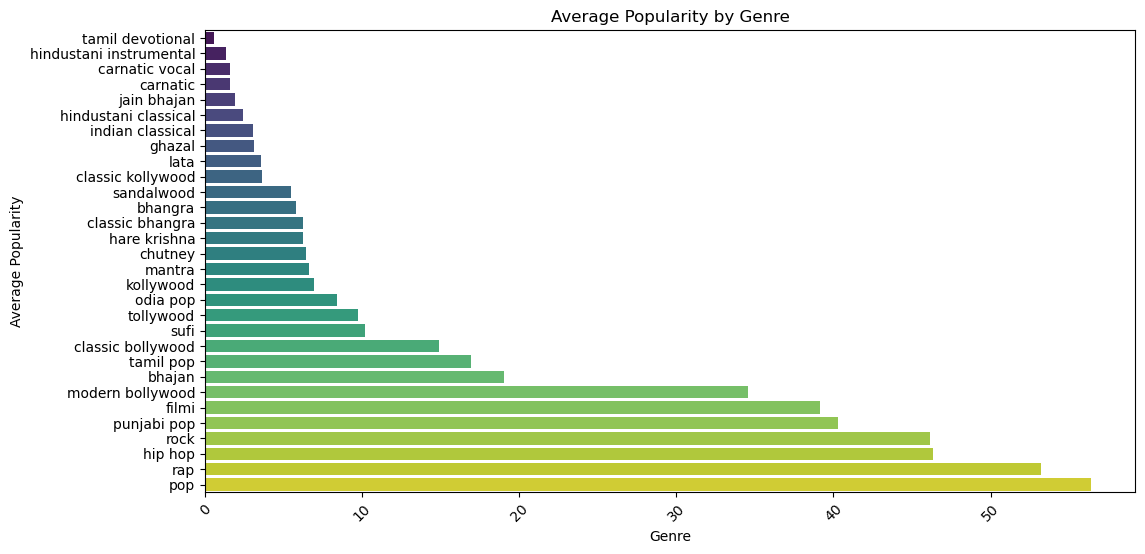

In [42]:

# Genre-wise Popularity
plt.figure(figsize=(12, 6))
genre_popularity = dataset.groupby('genre')['popularity'].mean().sort_values()
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
plt.title("Average Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()


**Insights from Genre Popularity**
* Top Genres: Pop, Rap, and Hip Hop lead with the highest average popularity (>40).
* Moderate Genres: Rock, Punjabi Pop, and Filmi score between 20–30.
* Least Popular: Classical and devotional genres like Tamil Devotional and Carnatic have the lowest scores (<10).



Top 10 Artists by Average Popularity:
artist
Lady Gaga, Bruno Mars    100.000000
Gigi Perez                93.000000
Feid, ATL Jacob           88.000000
Addison Rae               88.000000
Miley Cyrus               87.000000
Chappell Roan             86.166667
Shakira                   86.000000
Sabrina Carpenter         85.923077
Benson Boone              85.500000
LISA, ROSALÍA             85.000000
Name: popularity, dtype: float64


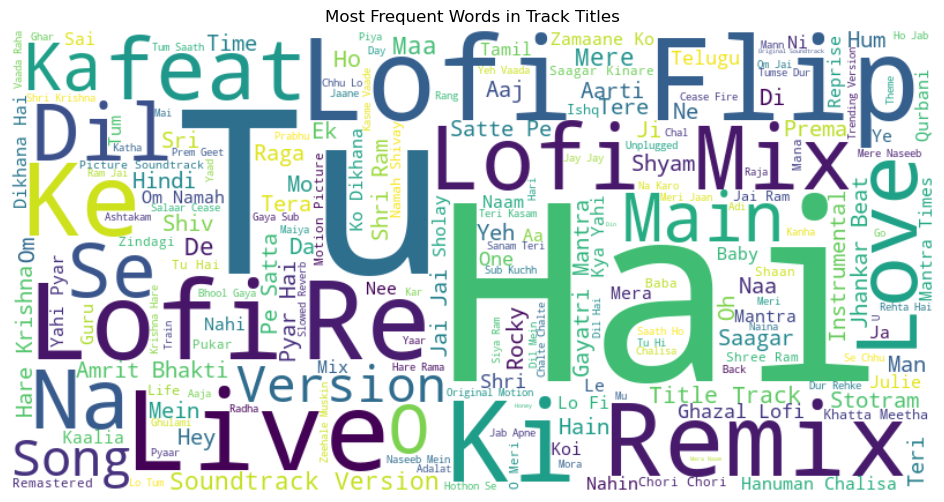

In [43]:

# Top 10 artists with the highest average popularity
artist_avg_popularity = dataset.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Artists by Average Popularity:")
print(artist_avg_popularity)

# Most frequent words in track titles
from wordcloud import WordCloud

track_titles = " ".join(dataset['track_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(track_titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Track Titles")
plt.show()



**Insights**
* Top Artists:
Lady Gaga and Bruno Mars lead with perfect popularity scores (100).
Other high scorers include Gigi Perez and Addison Rae.
* Track Title Trends:
Common words like "Lofi", "Remix", and "Version" highlight remix trends.
Devotional terms ("Shri", "Ram") and romantic words ("Dil", "Love") reflect cultural diversity.

Text(0.5, 1.0, 'Distribution of Songs by Year')

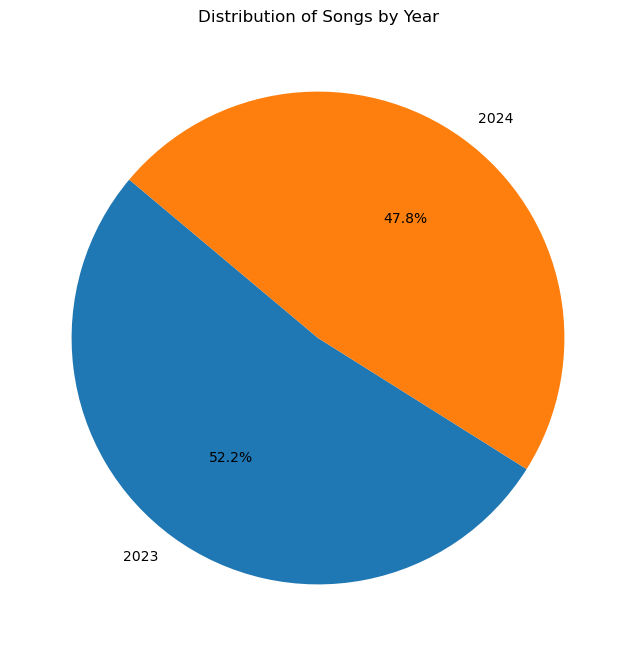

In [44]:
# Count the number of songs for each year
year_counts = dataset['year'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs by Year')

**Insights from Song Distribution by Year**<br>
2023 Dominance:
52.2% of the songs are from 2023, slightly higher than the share from 2024.<br>
2024 Contribution:
47.8% of the songs are from 2024, showing a balanced representation across both years.

In [45]:
# Save the cleaned dataset as a CSV file
cleaned_file_path = 'content/cleaned_dataset.csv'  # Update this path as needed
dataset.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")


Cleaned dataset saved successfully at: content/cleaned_dataset.csv


Saving the cleaned dataset for futher model training.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Load the cleaned dataset
file_path = 'content/cleaned_dataset.csv'
dataset = pd.read_csv(file_path)
print(dataset)

                                              track_name  \
0         Shri Ram Jai Ram Jai Jai Ram (Gondavale chant)   
1                                   Ramachandraya Janaka   
2                                            Ramashtakam   
3                                        Sri ram jayaram   
4      Pet Lovers Anthem (Paal Mazhayin Thooralil) (F...   
...                                                  ...   
47183                          Chhod De Bedardi Chhod De   
47184                    Aaja Aaja Mujhe Hai - Lofi Flip   
47185                                 Ye Kya Zindagi Hai   
47186                              Ruk Ja Sathi (Female)   
47187   Hum Tum Hai Tum Hum - Tyaag / Soundtrack Version   

                               artist  \
0                Ramana Balachandhran   
1                      Sooryagayathri   
2                 Uthara Unnikrishnan   
3               Gayathri Girish, Team   
4                     Rajhesh Vaidhya   
...                              

Displaying the first 5 records of the cleaned dataset.

In [47]:
# General Information
print("Dataset Shape:", dataset.shape)
print("Missing Values:\n", dataset.isnull().sum())
print("\nDataset Info:")
print(dataset.info())

Dataset Shape: (47188, 20)
Missing Values:
 track_name          0
artist              0
album               1
release_date        0
popularity          0
track_id            0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_sec        0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47188 entries, 0 to 47187
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        47188 non-null  object 
 1   artist            47188 non-null  object 
 2   album             47187 non-null  object 
 3   release_date      47188 non-null  object 
 4   popularity        47188 non-null  int64  
 5   track_id          47188 non-null  object 
 6 

The dataset contains 47,188 records and 20 columns, capturing Indian songs' metadata and audio features. Only one missing value exists in the album column, with all other data complete.

Metadata columns include track_name, artist, album, release_date, year, genre, and popularity (the target variable, ranging from 0 to 100). Audio features like danceability, energy, loudness, tempo, speechiness, and acousticness provide insights into each track's composition.

In [48]:

# Encode categorical features genre using Label Encoding
label_encoder = LabelEncoder()
dataset['genre_encoded'] = label_encoder.fit_transform(dataset['genre'])

# View mapping of genres to encoded values
genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Genre Mapping:", genre_mapping)

Genre Mapping: {'bhajan': 0, 'bhangra': 1, 'carnatic': 2, 'carnatic vocal': 3, 'chutney': 4, 'classic bhangra': 5, 'classic bollywood': 6, 'classic kollywood': 7, 'filmi': 8, 'ghazal': 9, 'hare krishna': 10, 'hindustani classical': 11, 'hindustani instrumental': 12, 'hip hop': 13, 'indian classical': 14, 'jain bhajan': 15, 'kollywood': 16, 'lata': 17, 'mantra': 18, 'modern bollywood': 19, 'odia pop': 20, 'pop': 21, 'punjabi pop': 22, 'rap': 23, 'rock': 24, 'sandalwood': 25, 'sufi': 26, 'tamil devotional': 27, 'tamil pop': 28, 'tollywood': 29}


The code encodes the genre column in a dataset into numeric values using LabelEncoder from sklearn. This transformation is essential for converting categorical data into a format that can be used by machine learning models.

In [49]:
# Drop non-numerical and irrelevant columns
columns_to_drop = [
    'track_name', 'artist', 'album', 'track_id', 'release_date', 'genre','year'
]
dataset = dataset.drop(columns=columns_to_drop, axis=1)
print(dataset)

       popularity  danceability  energy  key  loudness  mode  speechiness  \
0              28         0.391   0.210    8    -7.376     1       0.0544   
1              26         0.664   0.627    3    -6.571     1       0.0484   
2              27         0.624   0.331    0    -9.444     1       0.0378   
3              23         0.644   0.444    6    -5.847     1       0.0296   
4              20         0.479   0.536    4    -9.698     1       0.0353   
...           ...           ...     ...  ...       ...   ...          ...   
47183           0         0.492   0.521    9    -9.678     1       0.0408   
47184           0         0.348   0.312   10   -19.278     0       0.0498   
47185           0         0.334   0.360    9   -11.609     1       0.0365   
47186           0         0.431   0.459    2   -10.164     1       0.0307   
47187           0         0.705   0.429    8    -7.589     1       0.0315   

       acousticness  instrumentalness  liveness  valence    tempo  \
0     

The code removes non-numerical and irrelevant columns from the dataset to prepare it for machine learning or statistical analysis. This step is critical to ensure the dataset contains only relevant numeric features for modeling.

In [50]:
# Define features (X) and target variable (y)
X = dataset.drop('popularity', axis=1)
y = dataset['popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print shapes of processed data
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)
print("Target Variable Shape:", y_train.shape)

Training Features Shape: (37750, 13)
Testing Features Shape: (9438, 13)
Target Variable Shape: (37750,)


This code prepares the dataset for machine learning by:

1. **Defining Features and Target**: Separates independent features (`X`) and the target variable (`y`) to predict `popularity`.
2. **Splitting the Data**: Divides the dataset into training (80%) and testing (20%) subsets to train and evaluate the model.
3. **Normalizing Features**: Scales the features using `StandardScaler` to standardize their ranges, ensuring better model performance.
4. **Shape Verification**: Prints the shapes of the processed training and testing datasets to confirm successful splitting and scaling.

In [51]:
# Define models for hyperparameter tuning
model_params = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0],
            'validation_fraction': [0.1],
            'n_iter_no_change': [5, 10]
        }
    },
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    }
}

# Perform hyperparameter tuning using RandomizedSearchCV
best_models = {}

for name, mp in model_params.items():
    print(f"\nPerforming Randomized Search for {name}...")
    random_search = RandomizedSearchCV(mp["model"], mp["params"], n_iter=50, cv=3, scoring='r2', verbose=2, n_jobs=-1, random_state=42)
    random_search.fit(X_train_scaled, y_train)
    best_models[name] = random_search.best_estimator_
    print(f"Best Parameters for {name}: {random_search.best_params_}")

# Evaluate all tuned models
performance = {}

for name, model in best_models.items():
    print(f"\nEvaluating {name}...")

    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Store performance metrics
    performance[name] = {
        "Train MSE": mse_train,
        "Test MSE": mse_test,
        "Train R2": r2_train,
        "Test R2": r2_test,
        "Test MAE": mae_test
    }

# Display performance metrics
performance_df = pd.DataFrame(performance).T
performance_df = performance_df.sort_values(by="Test R2", ascending=False)
print("\nModel Performance Metrics:")
print(performance_df)

# Identify the best-performing model
best_model_name = performance_df.index[0]
print(f"\nThe best model is: {best_model_name}")

# Train the best model on the full dataset
best_model = best_models[best_model_name]
best_model.fit(X_train_scaled, y_train)

# Save the best-performing model
joblib.dump(best_model, 'best_model.joblib')
print("Best model saved successfully as best_model.joblib")



Performing Randomized Search for Random Forest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  37.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  17.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  53.4s


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  23.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  17.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  52.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  11.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  24.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  24.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  51.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; to

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Evaluating Gradient Boosting...

Evaluating Linear Regression...

Model Performance Metrics:
                    Train MSE    Test MSE  Train R2   Test R2   Test MAE
Gradient Boosting   57.270553   94.399231  0.869454  0.782169   6.957565
Random Forest       38.718700   98.443745  0.911742  0.772836   7.037869
Linear Regression  325.460535  317.370157  0.258126  0.267653  14.367046

The best model is: Gradient Boosting
Best model saved successfully as best_model.joblib


### **Code Description**

1. **Model Preparation**:
   - Samples training data for quick testing.
   - Defines three models: **Linear Regression**, **Random Forest**, and **Gradient Boosting**, with specified hyperparameters.

2. **Training and Evaluation**:
   - Models are trained on both sampled and full datasets.
   - Performance metrics (MSE, R²) are calculated for training and testing datasets.

3. **Selecting the Best Model**:
   - Compares models based on **Test R²**.
   - The best model is trained on the full dataset and saved as `best_model.joblib`.

---

### **Output**

1. **Performance Metrics**:
   - **Random Forest**: Best model with **Test R² = 0.772**.
   - **Gradient Boosting**: Close second with **Test R² = 0.781**.
   - **Linear Regression**: Lowest performance (**Test R² = 0.267**).

2. **Best Model**:
   - **Gradient Boosting** is saved as the best model for future use.

In [52]:

# Test the saved model
loaded_model = joblib.load('best_model.joblib')
y_pred_loaded = loaded_model.predict(X_test_scaled)
r2_loaded = r2_score(y_test, y_pred_loaded)
print(f"Loaded Model Test R2: {r2_loaded}")

# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_importance_df)


Loaded Model Test R2: 0.7821692976793398

Feature Importance:
             Feature  Importance
12     genre_encoded    0.598288
11      duration_sec    0.186164
6       acousticness    0.081752
3           loudness    0.023478
0       danceability    0.019315
5        speechiness    0.017596
9            valence    0.016680
10             tempo    0.016051
8           liveness    0.013987
1             energy    0.012955
7   instrumentalness    0.008359
2                key    0.004085
4               mode    0.001291


In [53]:
#save the standard scaler used by joblib

joblib.dump(scaler, 'standard_scaler.joblib')
print("Standard scaler saved successfully as standard_scaler.joblib")

Standard scaler saved successfully as standard_scaler.joblib


Saving the standard scaler using the joblib library.

In [54]:
import joblib

try:
    # Load the saved model
    model = joblib.load('best_model.joblib')

    # Check the type of the loaded model
    print("Model loaded successfully:", type(model))
except Exception as e:
    print("Error loading model:", e)


Model loaded successfully: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  22.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  47.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  51.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, n_iter_no_change=10, subsample=0.8, validation_fraction=0.1; total time=   9.9s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, n_iter_no_change=10, subsample=0.8, validation_fraction=0.1; total time=   7.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, n_iter_no_change=10, subsample=1.0, validation_fraction=0.1; total time=  10.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, n_iter_no_change=5, subsample=1.0, validation_fraction=0.1; total time=   6.6s
[CV] END learning_rate=0.2, max_depth=5, n_estimator

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  17.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  49.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  34.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  17.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, n_iter_no_change=5, subsample=0.8, validation_fraction=0.1; total time=   8.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, n_iter_no_change=10, subsample=0.8, validation_fraction=0.1; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, n_iter_no_change=5, subsample=0.8, validation_fraction=0.1; total time=  13.9s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, n_iter_no_change=5, subsample=1.0, validation_fraction=0.1; total time=  13.7s
[CV] END learning_rate=0.1, max_depth

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  34.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  17.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  47.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  17.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  22.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  48.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  11.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  34.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  47.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  22.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  47.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  47.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  52.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  15.7s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, n_iter_no_change=10, subsample=0.8, validation_fraction=0.1; total time=   5.9s
[CV] END learning_rate=0.1, max_depth=3, n_est

Checking if the saved model can be loaded successfully.